### MEDICAL IMAGE PREPROCESSING TOOL

This notebook demonstrates various image processing transformations on a medical or grayscale image, including translation, scaling, shearing, rotation, flipping, cropping, and color mapping. Each section applies a specific transformation, followed by a visual comparison to the original image to illustrate the effects clearly along with corresponding code for each transformations below.

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
img = cv2.imread("C:/Users/cw/Desktop/LOWER LEG CORONAL.jpg")

Text(0.5, 1.0, 'Original Image')

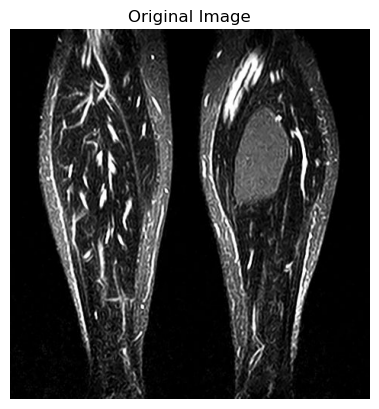

In [45]:
plt.imshow(img,cmap='gray')  
plt.axis('off')
plt.title('Original Image')

Text(0.5, 1.0, 'Grayscale Image')

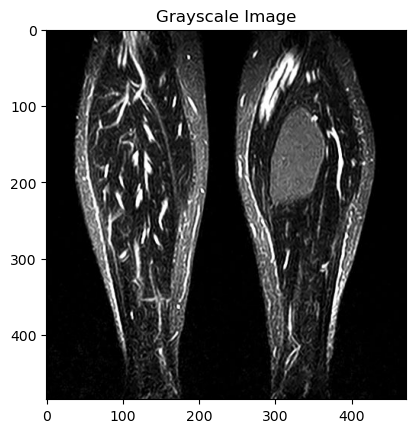

In [58]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.title('Grayscale Image')

In [47]:
#thresholding
_, thresh = cv2.threshold(img_gray,40 ,255,cv2.THRESH_BINARY)                # 40 , 255 : can be changed acc/to  requirement and selected image

In [48]:
#contouring
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)       # x : initial width value , w : width of contour 
x, y, w, h = cv2.boundingRect(max(contours, key = cv2.contourArea))                      # y : initial height value , h : height of contour 

In [49]:
#cropping
cropped = img[y:y+h, x:x+w]

In [63]:
#Color-Map

colored = cv2.applyColorMap(cropped, cv2.COLORMAP_JET)          # applies color to the cropped image

In [60]:
#scaling

scaled = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

In [53]:
#translation

tx, ty = 5, 300
translation_matrix = np.float32([[1,0, tx], [0, 1, ty]])
translated = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))
translatedRGB = cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)

In [61]:
#shearing

sheared = cv2.warpAffine(img, np.float32([[1,0.5,0], [0,1,0]]), (img.shape[1], img.shape[0]))

In [62]:
#rotation

rot_matrix = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 90, 1)
rotated = cv2.warpAffine(img, rot_matrix, (img.shape[1], img.shape[0]))

In [56]:
#fliping image

flipped = np.fliplr(img)       # for Horizontal flip (left-right)

# flipped = np.flipud(img)     # for vertical flip (up-down)

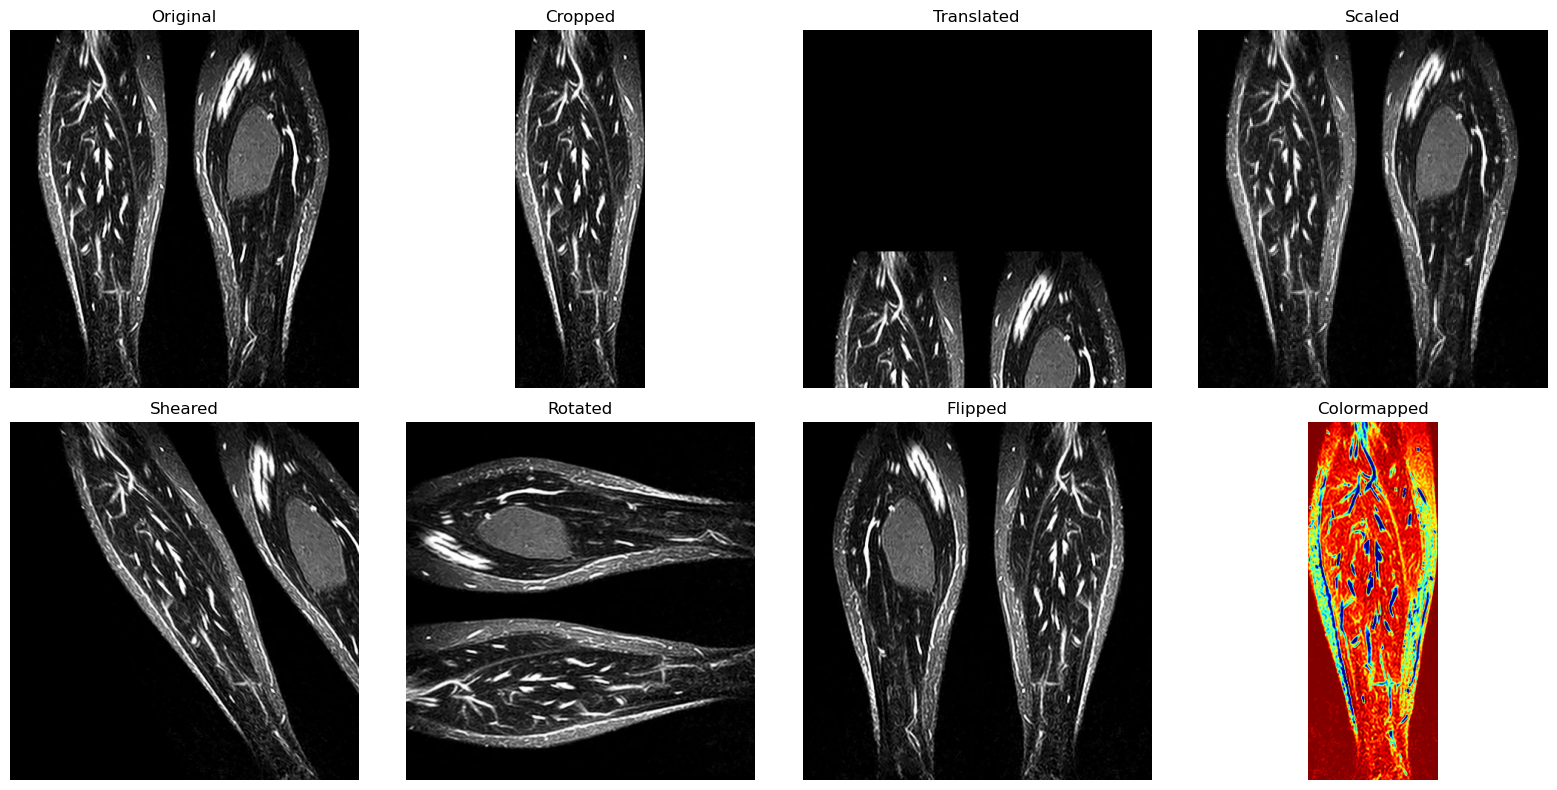

In [57]:
import matplotlib.pyplot as plt

# Assuming you already have all transformed images:
# img, cropped, translated, scaled, sheared, rotated, flipped, colored

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

axes[0, 1].imshow(cropped, cmap='gray')
axes[0, 1].set_title("Cropped")
axes[0, 1].axis('off')

axes[0, 2].imshow(translated, cmap='gray')
axes[0, 2].set_title("Translated")
axes[0, 2].axis('off')

axes[0, 3].imshow(scaled, cmap='gray')
axes[0, 3].set_title("Scaled")
axes[0, 3].axis('off')

axes[1, 0].imshow(sheared, cmap='gray')
axes[1, 0].set_title("Sheared")
axes[1, 0].axis('off')

axes[1, 1].imshow(rotated, cmap='gray')
axes[1, 1].set_title("Rotated")
axes[1, 1].axis('off')

axes[1, 2].imshow(flipped, cmap='gray')
axes[1, 2].set_title("Flipped")
axes[1, 2].axis('off')

axes[1, 3].imshow(colored)
axes[1, 3].set_title("Colormapped")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


NOTE : By changing the parameter values in particular transformation, you can observe the corresponding change.